# K Means Clustering for Customer Data

In [26]:
import numpy as np
import pandas as pd
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
from sklearn.cluster import KMeans

import warnings

warnings.filterwarnings("ignore")

## Data Exploration

In [43]:
df = pd.read_csv(
    "https://raw.githubusercontent.com/anyoneai/notebooks/main/datasets/mall_customers.csv"
)
df.head()

,CustomerID,Gender,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40
...,...,...,...,...,...
195,196,Female,35,120,79
196,197,Female,45,126,28
197,198,Male,32,126,74
198,199,Male,32,137,18


In [28]:
df.columns

Index(['CustomerID', 'Gender', 'Age', 'Annual Income (k$)',
       'Spending Score (1-100)'],
      dtype='object')

In [29]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   CustomerID              200 non-null    int64 
 1   Gender                  200 non-null    object
 2   Age                     200 non-null    int64 
 3   Annual Income (k$)      200 non-null    int64 
 4   Spending Score (1-100)  200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [30]:
df.describe()

,CustomerID,Age,Annual Income (k$),Spending Score (1-100)
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,38.850000,60.560000,50.200000
std,57.879185,13.969007,26.264721,25.823522
min,1.000000,18.000000,15.000000,1.000000
25%,50.750000,28.750000,41.500000,34.750000
50%,100.500000,36.000000,61.500000,50.000000
75%,150.250000,49.000000,78.000000,73.000000
max,200.000000,70.000000,137.000000,99.000000


## TODO:

### Exploratory data analysis 

To understand the dataset a little better, perform Pairplot/Distplot of features, colored by the gender.

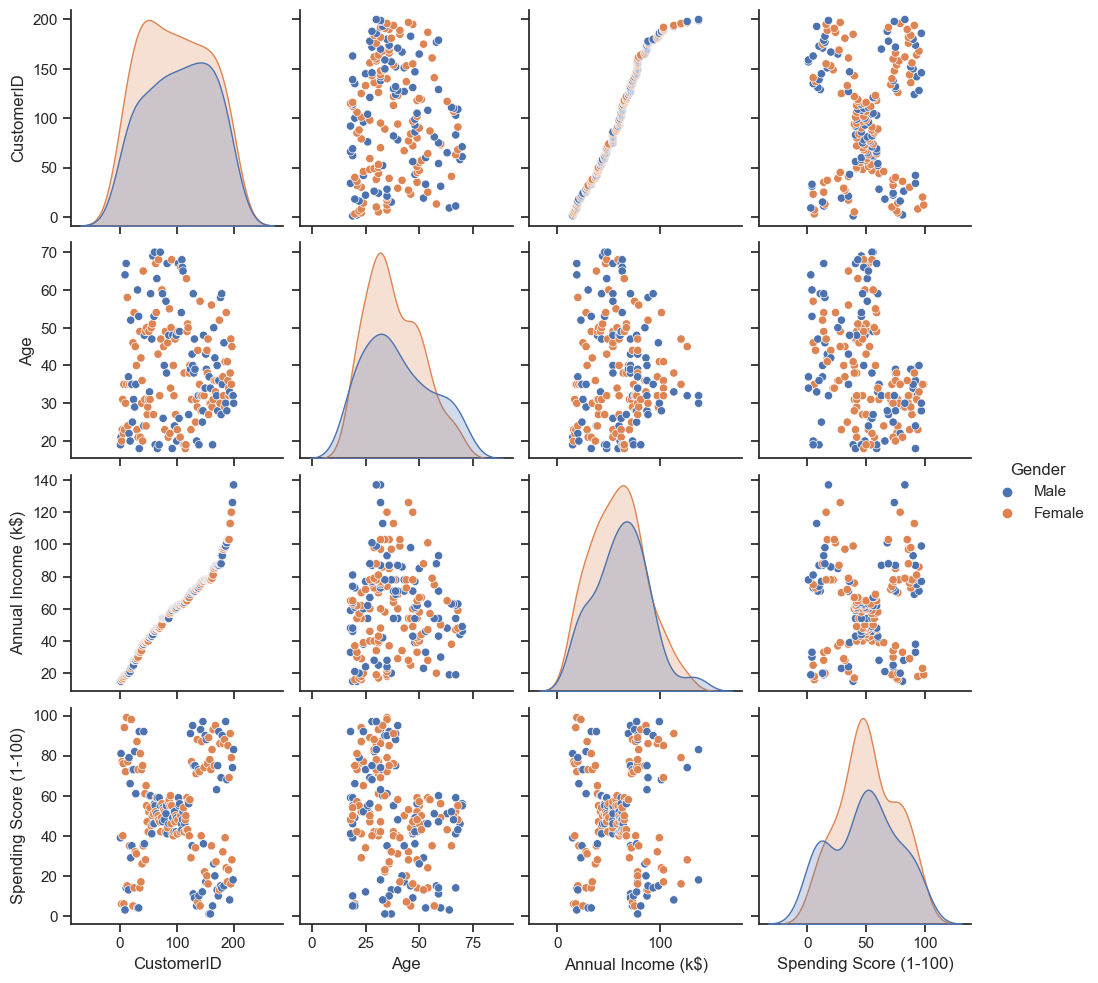

In [31]:
# We create the pair plots:
sns.set(style="ticks")
sns.pairplot(df, hue="Gender")
plt.show()

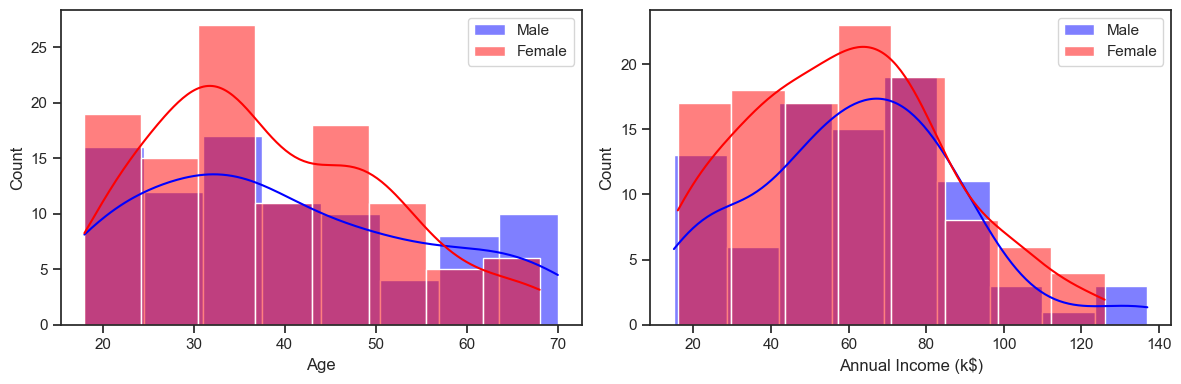

In [32]:
# We now create the distribution plots:
plt.figure(figsize=(12, 4))
plt.subplot(1, 2, 1)
sns.histplot(df[df["Gender"] == "Male"]["Age"], color="blue", label="Male", kde=True)
sns.histplot(df[df["Gender"] == "Female"]["Age"], color="red", label="Female", kde=True)
plt.xlabel("Age")
plt.legend()

plt.subplot(1, 2, 2)
sns.histplot(
    df[df["Gender"] == "Male"]["Annual Income (k$)"],
    color="blue",
    label="Male",
    kde=True,
)
sns.histplot(
    df[df["Gender"] == "Female"]["Annual Income (k$)"],
    color="red",
    label="Female",
    kde=True,
)
plt.xlabel("Annual Income (k$)")
plt.legend()

plt.tight_layout()
plt.show()

### Apply feature scaling

Many clustering algorithms are sensitive to the scale of the data. Apply feature scaling to the dataset before fitting the clustering model.

In [33]:
# We import the MinMaxScaler and StandardScaler from sklearn library:
from sklearn.preprocessing import StandardScaler

# We select the numerical columns for scaling:
numerical_cols = ["Age", "Annual Income (k$)", "Spending Score (1-100)"]

# We separate the features for scaling:
num_cols = df[numerical_cols]

# We initialize scalers:
std_scaler = StandardScaler()

# Apply Min-Max scaling
numcols_std_scaler = std_scaler.fit_transform(num_cols)

### Cluster the data

To find the best value of K, run K-Means with different values, plot the curve of Inertia vs K, and find the best value using the Elbow method

In [34]:
# We fit K-Means clustering on scaled data:
kmeans = KMeans(n_clusters=3, random_state=42)
kmeans.fit(numcols_std_scaler)

# Then we add cluster labels to the original DataFrame:
df["Cluster Labels"] = kmeans.labels_

In [35]:
# We initialize an empty listo to store Inertia values for different K:
inertia_values_scaled_data = []

# We now try different values for K from 1 to 10 and calculate the Inertia:
for k in range(1, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    kmeans.fit(numcols_std_scaler)
    inertia_values_scaled_data.append(kmeans.inertia_)

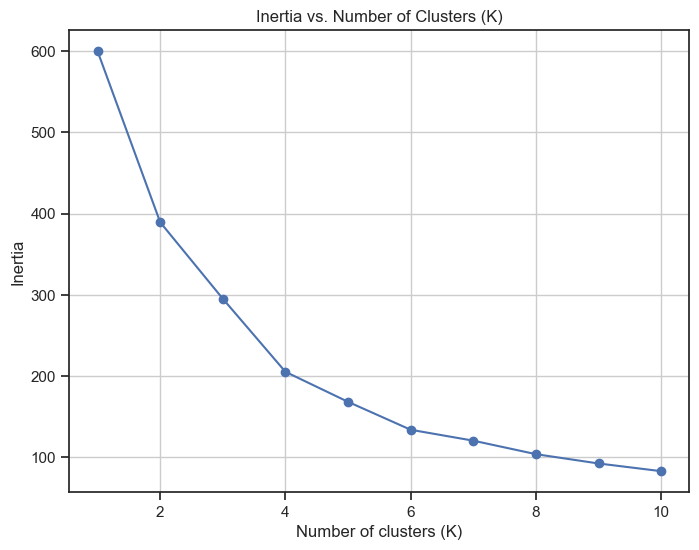

In [36]:
# We plot the Inertia vs K curve:
plt.figure(figsize=(8, 6))
plt.plot(range(1, 11), inertia_values_scaled_data, marker="o", linestyle="-", color="b")
plt.title("Inertia vs. Number of Clusters (K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Inertia")
plt.grid(True)
plt.show()

# Find optimal K with Silhouette

Use the Silhouette index to find the best value of K for this dataset. You will need to again fit the model for various values of K.

Does it coincide with the Elbow method?

In [37]:
from sklearn.metrics import silhouette_score

# We initialize an empty listo to store Silhoutte score for different scores:
silhouette_scores = []

# We try different values of K (from 1 to 10) and calculate Silhouette scores:
for k in range(2, 11):  # Silhouette score requires at least 2 clusters
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(numcols_std_scaler)
    silhouette_avg = silhouette_score(numcols_std_scaler, cluster_labels)
    silhouette_scores.append(silhouette_avg)

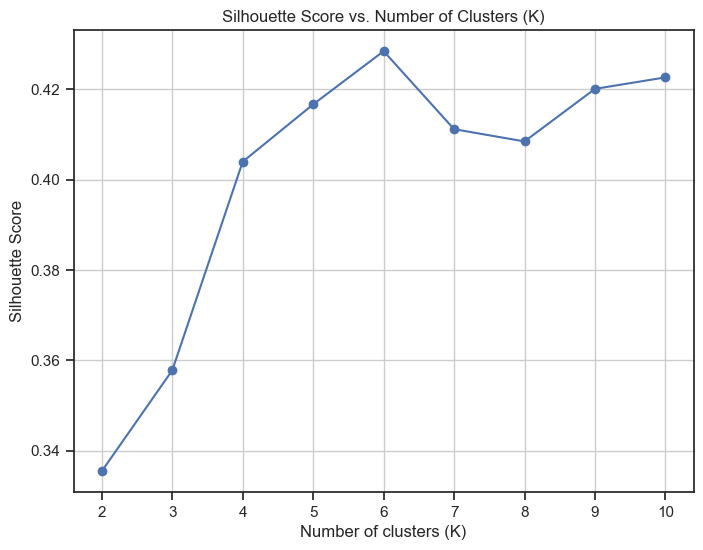

In [38]:
# We plot the Silhouette scores vs. the number of clusters (K):
plt.figure(figsize=(8, 6))
plt.plot(range(2, 11), silhouette_scores, marker="o", linestyle="-", color="b")
plt.title("Silhouette Score vs. Number of Clusters (K)")
plt.xlabel("Number of clusters (K)")
plt.ylabel("Silhouette Score")
plt.grid(True)
plt.show()

In [39]:
# We initialize an empty list to store results as dictionaries:
K_results = []

# We now try different values of K (e.g., from 2 to 10) and calculate Silhouette scores:
for k in range(2, 11):
    kmeans = KMeans(n_clusters=k, random_state=42)
    cluster_labels = kmeans.fit_predict(numcols_std_scaler)
    silhouette_avg = silhouette_score(numcols_std_scaler, cluster_labels)

    # Storing the results in a dictionary:
    K_results.append({"K": k, "Silhouette Score": silhouette_avg})

# We create a DataFrame from the list of results to store the data:
results_df = pd.DataFrame(K_results)

results_df

,K,Silhouette Score
0,2,0.335472
1,3,0.357793
2,4,0.403958
3,5,0.416643
4,6,0.428417
5,7,0.411155
6,8,0.408443
7,9,0.420074
8,10,0.422616


In [40]:
# We now try to find the best K value that maximizes the Silhouette score:
best_K = results_df.iloc[results_df["Silhouette Score"].idxmax()]
print(f"The best number of clusters is {best_K}")

The best number of clusters is K                   6.000000
Silhouette Score    0.428417
Name: 4, dtype: float64


# Other clustering algorithms
Try using other clustering algorithms such as DBScan. 

In the case of DBScan, try finding the optimal Silhouette by varying the $epsilon$ (`eps`) distance and the min number of samples of the neighbourhood for a core point (`min_samples`). Do the number of clusters found matches those obtained with K-Means?


In [44]:
# We import the necessary libraries:
from sklearn.cluster import DBSCAN

# We now create a range of values for eps and min_samples:
eps_values = np.linspace(0.05, 2.0, 20)  # Adjust the range as needed
min_samples_values = range(2, 10)  # Adjust the range as needed

best_eps = None
best_min_samples = None
best_silhouette_score = -1

# We perform a grid search over eps and min_samples:
for eps in eps_values:
    for min_samples in min_samples_values:
        dbscan = DBSCAN(eps=eps, min_samples=min_samples)
        cluster_labels = dbscan.fit_predict(numcols_std_scaler)
        if (
            len(set(cluster_labels)) > 1
        ):  # Silhouette score requires at least 2 clusters
            silhouette_avg = silhouette_score(numcols_std_scaler, cluster_labels)
            if silhouette_avg > best_silhouette_score:
                best_silhouette_score = silhouette_avg
                best_eps = eps
                best_min_samples = min_samples

print(f"Best epsilon: {best_eps}")
print(f"Best min_samples: {best_min_samples}")
print(f"Best Silhouette Score: {best_silhouette_score}")

Best epsilon: 0.9736842105263158
Best min_samples: 8
Best Silhouette Score: 0.31385583158654196


#  Using PCA to visualize results 

Use PCA to reduce from the number of features to only 2, and then plot the results using a scatterplot, with the cluster as the hue of the markers.

<Axes: xlabel='PC1', ylabel='PC2'>

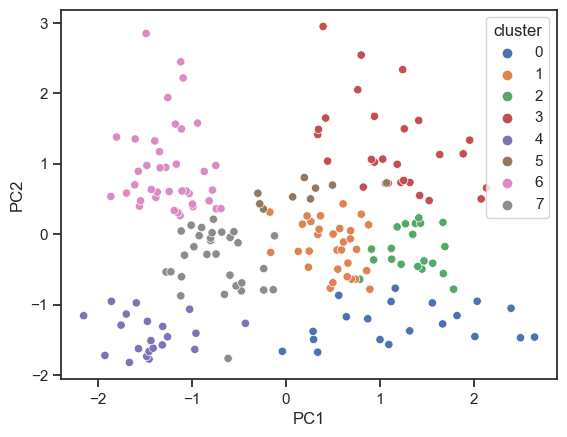

In [68]:
from sklearn.decomposition import PCA

# We perform a PCA to reduce to 2 components:
pca = PCA(n_components=2)
pca_result = pca.fit_transform(numcols_std_scaler)

# Now, we create a new DataFrame with the reduced features and cluster labels:
pca_df = pd.DataFrame(data=pca_result, columns=["PC1", "PC2"])
kmeans = KMeans(n_clusters=6).fit(
    numcols_std_scaler
)  # We use n° clusters = 6 according our previous analysis
pca_df["cluster"] = pd.Categorical(kmeans.labels_)

# We plot our results:
sns.scatterplot(x="PC1", y="PC2", hue="cluster", data=pca_df)